# Part 3: Machine Learning Modeling (WITHOUT MOOD)

Tasks: Load Processed Data, Baseline Model- Logistic Regression, Train Models(Initial) - Random Forest, XG Boost, SVM

## Load Processed data

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# ============================================================
# 1. Load files from processed data path
# ============================================================ 
X_train = pd.read_csv("../data/processed_v1/X_train_final.csv")
X_test = pd.read_csv("../data/processed_v1/X_test_final.csv")
y_train = pd.read_csv("../data/processed_v1/y_train_final.csv").values.ravel()
y_test = pd.read_csv("../data/processed_v1/y_test_final.csv").values.ravel()
test_student_ids = pd.read_csv("../data/processed_v1/test_student_ids.csv").values.ravel()

## Baseline Model- Logistic Regression

In [3]:
# ============================================================
# 2. BASELINE MODEL: Logistic Regression
# ============================================================
baseline = LogisticRegression(max_iter=1000, class_weight='balanced')
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

Baseline Accuracy: 0.33789649415692824
              precision    recall  f1-score   support

           0       0.29      0.41      0.34      1708
           1       0.45      0.33      0.38      2587
           2       0.28      0.27      0.28      1695

    accuracy                           0.34      5990
   macro avg       0.34      0.34      0.33      5990
weighted avg       0.36      0.34      0.34      5990



/Users/leena/Desktop/Data Science/teen_mental_health_project/env/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/leena/Desktop/Data Science/teen_mental_health_project/env/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/leena/Desktop/Data Science/teen_mental_health_project/env/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/leena/Desktop/Data Science/teen_mental_health_project/env/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] =

# Train Initial Models

1. Random Forest

In [4]:
# ============================================================
# 3. RANDOM FOREST CLASSIFIER
# ============================================================
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

2. XG Boost Classifier

In [5]:
# ============================================================
# 4. XGBoost Classifier
# ============================================================
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

3. Support Vector Machine Classifier

In [6]:
# ============================================================
# 5. Support Vector Machine Classifier
# ============================================================

svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

## Model Evaluation (Initial)

In [ ]:
#Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n")
#Classification Reports
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))      

# ============================================================
# ~ Key Insights about the Dataset ~
# - Self-reported mood is a critical proximal predictor of stress; behavioral features alone are insufficient 
# for reliable multi-class stress classification.
# - Removing the mood feature resulted in a substantial drop in model performance, 
# with accuracy approaching random chance. This indicates that mood serves as a critical proximal 
# predictor of stress in the dataset. While behavioral and lifestyle features contribute contextual 
# information, they are insufficient on their own to reliably distinguish stress levels. These findings 
# highlight the importance of emotional self-reporting in daily stress prediction tasks.
# ============================================================

SVM Accuracy: 0.3323873121869783
Random Forest Accuracy: 0.4073455759599332
XGBoost Accuracy: 0.42086811352253756


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.38      0.33      1708
           1       0.43      0.30      0.36      2587
           2       0.29      0.33      0.31      1695

    accuracy                           0.33      5990
   macro avg       0.34      0.34      0.33      5990
weighted avg       0.35      0.33      0.33      5990

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.10      0.15      1708
           1       0.43      0.82      0.57      2587
           2       0.29      0.08      0.13      1695

    accuracy                           0.41      5990
   macro avg       0.34      0.34      0.28      5990
weighted avg       0.35      0.41      0.32      5990

XGBoost Classification Report:
               precision 

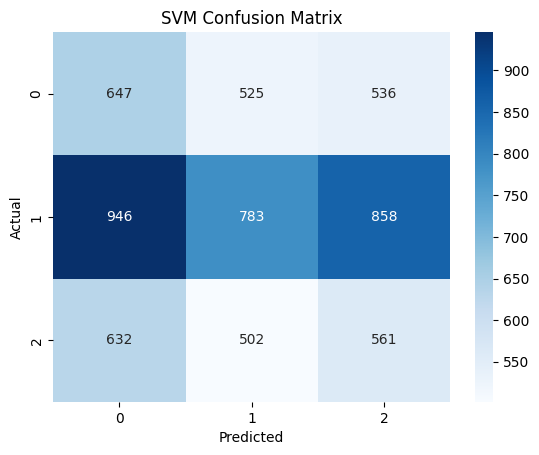

In [9]:
#Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
from sklearn.inspection import permutation_importance
import pandas as pd

perm = permutation_importance(
    svm,          # trained SVM (without mood)
    X_test,             # or X_train
    y_test,
    scoring='f1_macro',
    n_repeats=10,
    random_state=42
)

feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': perm.importances_mean
}).sort_values(by='importance', ascending=False)


feature_importance = feature_importance.reset_index(drop=True)
feature_importance


,feature,importance
0,meditated_today,0.003390
1,age,0.002619
2,support_feeling,0.002375
3,social_interaction_rating,0.001821
4,country_Brazil,0.001671
5,journaled_today,0.001551
6,country_USA,0.001437
7,country_India,0.000894
8,gender_Male,0.000285
9,day,0.000005
